In [1]:
# import libraries we need
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
# read the excel file
df = pd.read_excel("/Group Project Data-SFD Data-Toronto Police (1).xlsx")

In [3]:
# see the description of the data
df.describe(include='all')

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
count,5707.000000,5707.000000,5707.000000,5707,5707,5707.000000,5707,5707,5707.000000,5707.000000,...,5707,5707,5707.000000,5707.000000,5707.0,5707,5707.0,5707,5707.000000,5707.000000
unique,NaN,NaN,NaN,5707,3579,NaN,12,7,NaN,NaN,...,4,17,NaN,NaN,159.0,159,140.0,140,NaN,NaN
top,NaN,NaN,NaN,GO-2004397105,2019/08/05 04:00:00+00,NaN,August,Sunday,NaN,NaN,...,Evening,D31,NaN,NaN,25.0,Glenfield-Jane Heights,25.0,Glenfield-Jane Heights (25),NaN,NaN
freq,NaN,NaN,NaN,1,9,NaN,604,995,NaN,NaN,...,2307,998,NaN,NaN,311.0,311,304.0,304,NaN,NaN
mean,-79.481115,43.244138,2854.000000,NaN,NaN,2014.460662,NaN,NaN,187.198178,15.901174,...,NaN,NaN,0.122481,0.488172,NaN,NaN,NaN,NaN,-79.481115,43.244138
std,0.640212,4.532671,1647.613324,NaN,NaN,5.468803,NaN,NaN,100.269326,8.819631,...,NaN,NaN,0.349599,0.779148,NaN,NaN,NaN,NaN,0.640212,4.532671
min,-85.488744,0.000000,1.000000,NaN,NaN,2004.000000,NaN,NaN,1.000000,1.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-85.488744,0.000000
25%,-79.513346,43.676604,1427.500000,NaN,NaN,2010.000000,NaN,NaN,106.000000,8.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-79.513346,43.676604
50%,-79.439740,43.720796,2854.000000,NaN,NaN,2016.000000,NaN,NaN,192.000000,16.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-79.439740,43.720796
75%,-79.328082,43.755306,4280.500000,NaN,NaN,2019.000000,NaN,NaN,268.000000,23.000000,...,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,-79.328082,43.755306


In [4]:
# drop all the rows with missing values
df_clean = df.drop(df[df['HOOD_158']== "NSA"].index)

# reset all the index
df_clean.reset_index(drop=True, inplace=True)

# show df info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5643 entries, 0 to 5642
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5643 non-null   float64
 1   Y                  5643 non-null   float64
 2   OBJECTID           5643 non-null   int64  
 3   EVENT_UNIQUE_ID    5643 non-null   object 
 4   OCC_DATE           5643 non-null   object 
 5   OCC_YEAR           5643 non-null   int64  
 6   OCC_MONTH          5643 non-null   object 
 7   OCC_DOW            5643 non-null   object 
 8   OCC_DOY            5643 non-null   int64  
 9   OCC_DAY            5643 non-null   int64  
 10  OCC_HOUR           5643 non-null   int64  
 11  OCC_TIME_RANGE     5643 non-null   object 
 12  DIVISION           5643 non-null   object 
 13  DEATH              5643 non-null   int64  
 14  INJURIES           5643 non-null   int64  
 15  HOOD_158           5643 non-null   object 
 16  NEIGHBOURHOOD_158  5643 

In [5]:
# drop duplicated rows
df_clean.drop_duplicates()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764
5639,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920
5640,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,Night,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621
5641,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,Night,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083


In [6]:
# drop columns
df_clean = df_clean.drop(['X','Y','OBJECTID','EVENT_UNIQUE_ID','HOOD_140','NEIGHBOURHOOD_140'],axis =1)

In [7]:
# combine death and injuries column
df_clean['Death and Injuries'] = df_clean['DEATH'] + df_clean['INJURIES']
df_clean

,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,Death and Injuries
0,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,-79.234955,43.781528,0
1,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,-79.618218,43.733547,0
2,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,-79.518759,43.769157,2
3,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,-79.378870,43.660665,1
4,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,-79.212435,43.812075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,3,Night,D33,0,1,53,Henry Farm,-79.362941,43.771764,1
5639,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,3,Night,D14,1,1,164,Wellington Place,-79.402702,43.643920,2
5640,2022/02/21 05:00:00+00,2022,February,Monday,52,21,5,Night,D43,0,0,135,Morningside,-79.196217,43.786621,0
5641,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,1,Night,D11,0,2,83,Dufferin Grove,-79.443993,43.658083,2


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5643 entries, 0 to 5642
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OCC_DATE            5643 non-null   object 
 1   OCC_YEAR            5643 non-null   int64  
 2   OCC_MONTH           5643 non-null   object 
 3   OCC_DOW             5643 non-null   object 
 4   OCC_DOY             5643 non-null   int64  
 5   OCC_DAY             5643 non-null   int64  
 6   OCC_HOUR            5643 non-null   int64  
 7   OCC_TIME_RANGE      5643 non-null   object 
 8   DIVISION            5643 non-null   object 
 9   DEATH               5643 non-null   int64  
 10  INJURIES            5643 non-null   int64  
 11  HOOD_158            5643 non-null   object 
 12  NEIGHBOURHOOD_158   5643 non-null   object 
 13  LONG_WGS84          5643 non-null   float64
 14  LAT_WGS84           5643 non-null   float64
 15  Death and Injuries  5643 non-null   int64  
dtypes: flo

<Axes: xlabel='OCC_TIME_RANGE', ylabel='Death and Injuries'>

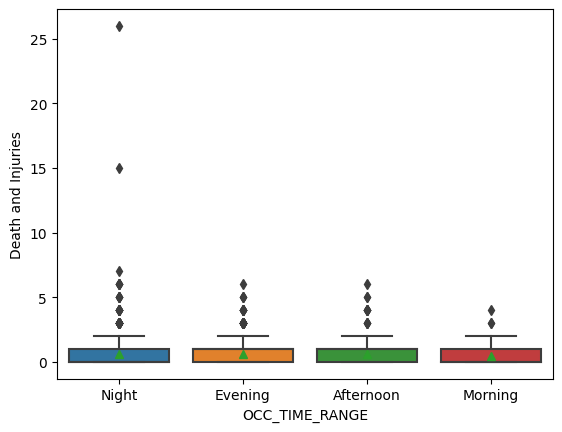

In [9]:
sns.boxplot(x="OCC_TIME_RANGE",
y="Death and Injuries",
data=df_clean,
showmeans=True)

In [10]:
value_counts_df = df_clean['OCC_MONTH'].value_counts().reset_index()

# Rename the columns
value_counts_df.columns = ['OCC_MONTH', 'Count']

# Display the DataFrame
print(value_counts_df)

    OCC_MONTH  Count
0      August    599
1        July    579
2   September    530
3         May    514
4        June    482
5     October    479
6     January    436
7       April    433
8    November    424
9       March    422
10   December    407
11   February    338


In [11]:
print(type(value_counts_df))

<class 'pandas.core.frame.DataFrame'>


In [12]:
df_clean.head()

,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,Death and Injuries
0,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,-79.234955,43.781528,0
1,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,-79.618218,43.733547,0
2,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,-79.518759,43.769157,2
3,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,-79.378870,43.660665,1
4,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,-79.212435,43.812075,0


In [13]:
df_clean.drop(columns= 'OCC_DATE', inplace=True)

In [14]:
df_clean


,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,Death and Injuries
0,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,-79.234955,43.781528,0
1,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,-79.618218,43.733547,0
2,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,-79.518759,43.769157,2
3,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,-79.378870,43.660665,1
4,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,-79.212435,43.812075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,2022,June,Thursday,153,2,3,Night,D33,0,1,53,Henry Farm,-79.362941,43.771764,1
5639,2022,July,Sunday,198,17,3,Night,D14,1,1,164,Wellington Place,-79.402702,43.643920,2
5640,2022,February,Monday,52,21,5,Night,D43,0,0,135,Morningside,-79.196217,43.786621,0
5641,2022,September,Sunday,254,11,1,Night,D11,0,2,83,Dufferin Grove,-79.443993,43.658083,2


In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5643 entries, 0 to 5642
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OCC_YEAR            5643 non-null   int64  
 1   OCC_MONTH           5643 non-null   object 
 2   OCC_DOW             5643 non-null   object 
 3   OCC_DOY             5643 non-null   int64  
 4   OCC_DAY             5643 non-null   int64  
 5   OCC_HOUR            5643 non-null   int64  
 6   OCC_TIME_RANGE      5643 non-null   object 
 7   DIVISION            5643 non-null   object 
 8   DEATH               5643 non-null   int64  
 9   INJURIES            5643 non-null   int64  
 10  HOOD_158            5643 non-null   object 
 11  NEIGHBOURHOOD_158   5643 non-null   object 
 12  LONG_WGS84          5643 non-null   float64
 13  LAT_WGS84           5643 non-null   float64
 14  Death and Injuries  5643 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 661.4+

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
df_clean.head(10)

,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,Death and Injuries
0,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,-79.234955,43.781528,0
1,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,-79.618218,43.733547,0
2,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,-79.518759,43.769157,2
3,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,-79.378870,43.660665,1
4,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,-79.212435,43.812075,0
5,2004,March,Sunday,74,14,0,Night,D33,0,0,150,Fenside-Parkwoods,-79.318704,43.759919,0
6,2004,January,Monday,19,19,23,Evening,D42,0,0,144,Morningside Heights,-79.197132,43.796763,0
7,2004,September,Wednesday,252,8,14,Afternoon,D23,0,0,2,Mount Olive-Silverstone-Jamestown,-79.588530,43.738688,0
8,2004,April,Wednesday,105,14,23,Evening,D14,0,0,85,South Parkdale,-79.427371,43.638954,0
9,2004,October,Wednesday,301,27,20,Evening,D33,0,1,150,Fenside-Parkwoods,-79.335299,43.762583,1


In [18]:
# Define custom mappings for OCC_MONTH and OCC_DOW
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
dow_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
time_range_mapping = {'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4}

# Encode OCC_MONTH based on custom mapping
df_clean['OCC_MONTH_ENCODED'] = df_clean['OCC_MONTH'].map(month_mapping)

# Encode OCC_DOW based on custom mapping
df_clean['OCC_DOW_ENCODED'] = df_clean['OCC_DOW'].map(dow_mapping)

# Encode OCC_TIME_RANGE based on custom mapping
df_clean['OCC_TIME_RANGE_ENCODED'] = df_clean['OCC_TIME_RANGE'].map(time_range_mapping)


In [19]:
df_clean['DIVISION'] = df_clean['DIVISION'].str.replace('D', '')

In [20]:
def dni(x):
    if x == 0:
        return 0
    else:
        return 1

In [21]:
# Create new column with rental count range using total_cat() function created above
df_clean['Casualties_YN'] = df_clean['Death and Injuries'].apply(dni)

In [22]:
df_clean['LONG_WGS84'] = df_clean['LONG_WGS84'].abs()

In [23]:
# drop columns
df_clean = df_clean.drop(['Death and Injuries'],axis =1)

In [24]:
# Create a mapping of month to quarter
month_to_quarter = {
    1: 1, 2: 1, 3: 1,    # Quarter 1 for months January, February, March
    4: 2, 5: 2, 6: 2,    # Quarter 2 for months April, May, June
    7: 3, 8: 3, 9: 3,    # Quarter 3 for months July, August, September
    10: 4, 11: 4, 12: 4  # Quarter 4 for months October, November, December
}

# Apply the mapping to create a new 'QUARTER' column
df_clean['QUARTER'] = df_clean['OCC_MONTH_ENCODED'].map(month_to_quarter)

# Display the DataFrame with the new 'QUARTER' column
df_clean.head()

,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,OCC_MONTH_ENCODED,OCC_DOW_ENCODED,OCC_TIME_RANGE_ENCODED,Casualties_YN,QUARTER
0,2004,May,Saturday,136,15,1,Night,41,0,0,142,Woburn North,79.234955,43.781528,5,6,4,0,2
1,2004,July,Monday,208,26,23,Evening,23,0,0,1,West Humber-Clairville,79.618218,43.733547,7,1,3,0,3
2,2004,May,Friday,135,14,16,Afternoon,31,1,1,24,Black Creek,79.518759,43.769157,5,5,2,1,2
3,2004,December,Sunday,354,19,0,Night,51,1,0,168,Downtown Yonge East,79.378870,43.660665,12,7,4,1,4
4,2004,April,Monday,103,12,22,Evening,42,0,0,146,Malvern East,79.212435,43.812075,4,1,3,0,2


In [25]:
# Create a new DataFrame with distinct "HOOD_158" values and their corresponding "NEIGHBOURHOOD_158" values
distinct_hood_neighborhood = df_clean[['HOOD_158', 'NEIGHBOURHOOD_158']].drop_duplicates()

# Print the table
distinct_hood_neighborhood.head(10)

,HOOD_158,NEIGHBOURHOOD_158
0,142,Woburn North
1,1,West Humber-Clairville
2,24,Black Creek
3,168,Downtown Yonge East
4,146,Malvern East
5,150,Fenside-Parkwoods
6,144,Morningside Heights
7,2,Mount Olive-Silverstone-Jamestown
8,85,South Parkdale
11,113,Weston


In [26]:
df_clean_1 = df_clean.drop(['OCC_MONTH','OCC_DOW','OCC_TIME_RANGE','HOOD_158','DEATH','INJURIES','LONG_WGS84','LAT_WGS84'],axis =1)

In [27]:
df_clean_2 = df_clean.drop(['OCC_MONTH','OCC_DOW','OCC_TIME_RANGE','NEIGHBOURHOOD_158','OCC_DOY','DEATH','INJURIES','OCC_DAY','OCC_HOUR'],axis =1)

In [28]:
df_clean_3 = df_clean.drop(['OCC_MONTH','OCC_DOW','OCC_TIME_RANGE','NEIGHBOURHOOD_158', 'DEATH','INJURIES'],axis =1)

In [29]:
df_clean_1.head(10)

,OCC_YEAR,OCC_DOY,OCC_DAY,OCC_HOUR,DIVISION,NEIGHBOURHOOD_158,OCC_MONTH_ENCODED,OCC_DOW_ENCODED,OCC_TIME_RANGE_ENCODED,Casualties_YN,QUARTER
0,2004,136,15,1,41,Woburn North,5,6,4,0,2
1,2004,208,26,23,23,West Humber-Clairville,7,1,3,0,3
2,2004,135,14,16,31,Black Creek,5,5,2,1,2
3,2004,354,19,0,51,Downtown Yonge East,12,7,4,1,4
4,2004,103,12,22,42,Malvern East,4,1,3,0,2
5,2004,74,14,0,33,Fenside-Parkwoods,3,7,4,0,1
6,2004,19,19,23,42,Morningside Heights,1,1,3,0,1
7,2004,252,8,14,23,Mount Olive-Silverstone-Jamestown,9,3,2,0,3
8,2004,105,14,23,14,South Parkdale,4,3,3,0,2
9,2004,301,27,20,33,Fenside-Parkwoods,10,3,3,1,4


In [30]:
df_clean_2.head(10)

,OCC_YEAR,DIVISION,HOOD_158,LONG_WGS84,LAT_WGS84,OCC_MONTH_ENCODED,OCC_DOW_ENCODED,OCC_TIME_RANGE_ENCODED,Casualties_YN,QUARTER
0,2004,41,142,79.234955,43.781528,5,6,4,0,2
1,2004,23,1,79.618218,43.733547,7,1,3,0,3
2,2004,31,24,79.518759,43.769157,5,5,2,1,2
3,2004,51,168,79.378870,43.660665,12,7,4,1,4
4,2004,42,146,79.212435,43.812075,4,1,3,0,2
5,2004,33,150,79.318704,43.759919,3,7,4,0,1
6,2004,42,144,79.197132,43.796763,1,1,3,0,1
7,2004,23,2,79.588530,43.738688,9,3,2,0,3
8,2004,14,85,79.427371,43.638954,4,3,3,0,2
9,2004,33,150,79.335299,43.762583,10,3,3,1,4


In [31]:
df_clean_3.head(10)

,OCC_YEAR,OCC_DOY,OCC_DAY,OCC_HOUR,DIVISION,HOOD_158,LONG_WGS84,LAT_WGS84,OCC_MONTH_ENCODED,OCC_DOW_ENCODED,OCC_TIME_RANGE_ENCODED,Casualties_YN,QUARTER
0,2004,136,15,1,41,142,79.234955,43.781528,5,6,4,0,2
1,2004,208,26,23,23,1,79.618218,43.733547,7,1,3,0,3
2,2004,135,14,16,31,24,79.518759,43.769157,5,5,2,1,2
3,2004,354,19,0,51,168,79.378870,43.660665,12,7,4,1,4
4,2004,103,12,22,42,146,79.212435,43.812075,4,1,3,0,2
5,2004,74,14,0,33,150,79.318704,43.759919,3,7,4,0,1
6,2004,19,19,23,42,144,79.197132,43.796763,1,1,3,0,1
7,2004,252,8,14,23,2,79.588530,43.738688,9,3,2,0,3
8,2004,105,14,23,14,85,79.427371,43.638954,4,3,3,0,2
9,2004,301,27,20,33,150,79.335299,43.762583,10,3,3,1,4


In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5643 entries, 0 to 5642
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OCC_YEAR                5643 non-null   int64  
 1   OCC_MONTH               5643 non-null   object 
 2   OCC_DOW                 5643 non-null   object 
 3   OCC_DOY                 5643 non-null   int64  
 4   OCC_DAY                 5643 non-null   int64  
 5   OCC_HOUR                5643 non-null   int64  
 6   OCC_TIME_RANGE          5643 non-null   object 
 7   DIVISION                5643 non-null   object 
 8   DEATH                   5643 non-null   int64  
 9   INJURIES                5643 non-null   int64  
 10  HOOD_158                5643 non-null   object 
 11  NEIGHBOURHOOD_158       5643 non-null   object 
 12  LONG_WGS84              5643 non-null   float64
 13  LAT_WGS84               5643 non-null   float64
 14  OCC_MONTH_ENCODED       5643 non-null   

In [33]:
# Using value_counts() to count the number of records for each neighborhood
neighborhood_counts = df_clean['NEIGHBOURHOOD_158'].value_counts()

# Print the counts
neighborhood_counts = neighborhood_counts.sort_values(ascending=False)

neighborhood_counts.head(10)


Glenfield-Jane Heights               311
Black Creek                          203
Mount Olive-Silverstone-Jamestown    192
West Humber-Clairville               132
York University Heights              117
Yorkdale-Glen Park                   113
Malvern East                         112
Englemount-Lawrence                  111
Regent Park                          109
Humber Summit                        106
Name: NEIGHBOURHOOD_158, dtype: int64

In [57]:
# Using value_counts() to count the number of records for each neighborhood
month_counts = df_clean['OCC_MONTH_ENCODED'].value_counts()

# Print the counts
month_counts = month_counts.sort_values(ascending=False)

month_counts


8     599
7     579
9     530
5     514
6     482
10    479
1     436
4     433
11    424
3     422
12    407
2     338
Name: OCC_MONTH_ENCODED, dtype: int64

Best_Month

In [34]:
# RandomForest_Neighbourhood
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have a DataFrame 'df_clean' with your data and the target variable in 'NEIGHBOURHOOD_158'

# Split the data into features (X) and target (y)
X = df_clean_1.drop(columns=['NEIGHBOURHOOD_158'])
y = df_clean_1['NEIGHBOURHOOD_158']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
model_r = RandomForestClassifier()

# Define a smaller hyperparameter grid to search over
param_grid = {
    'n_estimators': [25, 50, 100, 200],            # Number of trees in the forest
    'max_depth': [2, 4, 6, 8, 10],                 # Maximum depth of the tree
    'min_samples_split': [1, 2, 3, 4, 5],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1],            # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV with the model and hyperparameter grid
grid_search = GridSearchCV(model_r, param_grid, cv=5, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report and confusion matrix for the best model
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred))

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:")
print(best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-pa

Accuracy: 0.24800708591674048
Best Model Classification Report:
                                       precision    recall  f1-score   support

                      Agincourt North       0.00      0.00      0.00         2
         Agincourt South-Malvern West       0.00      0.00      0.00         6
                            Alderwood       0.00      0.00      0.00         1
                                Annex       0.00      0.00      0.00         2
                             Avondale       0.00      0.00      0.00         2
                    Banbury-Don Mills       0.00      0.00      0.00         3
                       Bathurst Manor       0.00      0.00      0.00         2
                      Bayview Village       0.00      0.00      0.00         4
                Bayview Woods-Steeles       0.00      0.00      0.00         2
                 Bedford Park-Nortown       0.00      0.00      0.00         2
              Beechborough-Greenbrook       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [35]:
# Make predictions on the test data
y_pred_labels = best_model.predict(X_test)

# Get the predicted probabilities for each class
y_pred_probabilities = best_model.predict_proba(X_test)

# Calculate average probabilities for each neighborhood
neighborhood_probabilities = {}
for neighborhood_idx, neighborhood in enumerate(best_model.classes_):
    neighborhood_probabilities[neighborhood] = []

for probabilities in y_pred_probabilities:
    for neighborhood_idx, prob in enumerate(probabilities):
        neighborhood_probabilities[best_model.classes_[neighborhood_idx]].append(prob)

# Calculate the average probability for each neighborhood
average_probabilities = {}
for neighborhood, probabilities in neighborhood_probabilities.items():
    average_probabilities[neighborhood] = sum(probabilities) / len(probabilities)

# Sort the neighborhoods based on average probabilities in descending order
sorted_average_probabilities = dict(sorted(average_probabilities.items(), key=lambda item: item[1], reverse=True))

# Print the average probabilities in descending order
for neighborhood, prob in sorted_average_probabilities.items():
    print(f"{neighborhood}: {prob:.4f}")

Glenfield-Jane Heights: 0.0565
Black Creek: 0.0390
Mount Olive-Silverstone-Jamestown: 0.0306
York University Heights: 0.0226
West Humber-Clairville: 0.0217
Englemount-Lawrence: 0.0207
Oakdale-Beverley Heights: 0.0204
Yorkdale-Glen Park: 0.0200
Malvern East: 0.0200
Humber Summit: 0.0199
Regent Park: 0.0181
Kensington-Chinatown: 0.0163
Flemingdon Park: 0.0161
Weston: 0.0159
Wellington Place: 0.0154
Rockcliffe-Smythe: 0.0153
Golfdale-Cedarbrae-Woburn: 0.0152
Rustic: 0.0151
Eglinton East: 0.0149
Kingsview Village-The Westway: 0.0145
West Hill: 0.0145
Oakwood Village: 0.0142
Moss Park: 0.0142
Dorset Park: 0.0138
Humbermede: 0.0124
L'Amoreaux West: 0.0123
Malvern West: 0.0115
Wexford/Maryvale: 0.0111
Elms-Old Rexdale: 0.0108
Clairlea-Birchmount: 0.0103
South Riverdale: 0.0097
Oakridge: 0.0096
Morningside Heights: 0.0094
South Parkdale: 0.0093
Woburn North: 0.0092
East L'Amoreaux: 0.0089
Brookhaven-Amesbury: 0.0089
Downtown Yonge East: 0.0087
Downsview: 0.0087
Mount Dennis: 0.0085
Scarborough

In [36]:
# GBC_Neighbourhood
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have a DataFrame 'df_clean_1' with your data and the target variable in 'NEIGHBOURHOOD_158'

# Split the data into features (X) and target (y)
X = df_clean_1.drop(columns=['NEIGHBOURHOOD_158'])
y = df_clean_1['NEIGHBOURHOOD_158']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier model
model_n = GradientBoostingClassifier()

# Define a smaller hyperparameter grid to search over
param_grid = {
    'n_estimators': [50],           # Number of boosting stages to be run
    'learning_rate': [0.1],         # Step size at each boosting iteration
    'max_depth': [3, 5],            # Maximum depth of the individual trees
}

# Initialize GridSearchCV with the model and hyperparameter grid
grid_search = GridSearchCV(model_n, param_grid, cv=3, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report and confusion matrix for the best model
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred))

print("Best Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:")
print(best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Accuracy: 0.22586359610274578
Best Model Classification Report:
                                       precision    recall  f1-score   support

                      Agincourt North       0.00      0.00      0.00         2
         Agincourt South-Malvern West       0.00      0.00      0.00         6
                            Alderwood       0.00      0.00      0.00         1
                                Annex       0.25      0.50      0.33         2
                             Avondale       0.00      0.00      0.00         2
                    Banbury-Don Mills       0.00      0.00      0.00         3
                       Bathurst Manor       0.00      0.00      0.00         2
                      Bayview Village       0.00      0.00      0.00         4
                Bayview Woods-Steeles       0.00      0.00      0.00         2
                 Bedford Park-Nortown       0.00      0.00      0.00         2
              Beechborough-Greenbrook       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [37]:
# KNN_NEIGHBOURHOOD
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have a DataFrame 'df_clean_1' with your data and the target variable in 'NEIGHBOURHOOD_158'

# Split the data into features (X) and target (y)
X = df_clean_1.drop(columns=['NEIGHBOURHOOD_158'])
y = df_clean_1['NEIGHBOURHOOD_158']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model
model_k = KNeighborsClassifier()

# Define a smaller hyperparameter grid to search over
param_grid = {
    'n_neighbors': [3, 5],          # Number of neighbors to consider
    'weights': ['uniform', 'distance'],   # Weight function used in prediction
    'p': [1, 2]                           # Power parameter for the Minkowski distance
}

# Initialize GridSearchCV with the model and hyperparameter grid
grid_search = GridSearchCV(model_k, param_grid, cv=5, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report and confusion matrix for the best model
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred))

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:")
print(best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.11603188662533215
Best Model Classification Report:
                                       precision    recall  f1-score   support

                      Agincourt North       0.00      0.00      0.00         2
         Agincourt South-Malvern West       0.00      0.00      0.00         6
                            Alderwood       0.00      0.00      0.00         1
                                Annex       0.00      0.00      0.00         2
                             Avondale       0.00      0.00      0.00         2
                    Banbury-Don Mills       0.00      0.00      0.00         3
                       Bathurst Manor       0.00      0.00      0.00         2
                      Bayview Village       0.00      0.00      0.00         4
                Bayview Woods-Steeles       0.00      0.00      0.00         2
                 Bedford Park-Nortown       0.00      0.00      0.00         2
              Beechborough-Greenbrook       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [38]:
# NB_Neighbourhood
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have a DataFrame 'df_clean_1' with your data and the target variable in 'NEIGHBOURHOOD_158'

# Split the data into features (X) and target (y)
X = df_clean_1.drop(columns=['NEIGHBOURHOOD_158'])
y = df_clean_1['NEIGHBOURHOOD_158']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes Classifier (GaussianNB)
model = GaussianNB()

# Define a hyperparameter grid to search over (GaussianNB has no hyperparameters, so this is just for demonstration)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],  # A smoothing parameter added to variances for numerical stability
}

# Initialize GridSearchCV with the model and hyperparameter grid
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report and confusion matrix for the best model
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred))

print("Best Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:")
print(best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.15234720992028344
Best Model Classification Report:
                                       precision    recall  f1-score   support

                      Agincourt North       0.00      0.00      0.00         2
         Agincourt South-Malvern West       0.00      0.00      0.00         6
                            Alderwood       0.00      0.00      0.00         1
                                Annex       0.00      0.00      0.00         2
                             Avondale       0.00      0.00      0.00         2
                    Banbury-Don Mills       0.20      0.33      0.25         3
                       Bathurst Manor       0.00      0.00      0.00         2
                      Bayview Village       0.00      0.00      0.00         4
                Bayview Woods-Steeles       0.00      0.00      0.00         2
                 Bedford Park-Nortown       0.00      0.00      0.00         2
              Beechborough-Greenbrook       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [39]:
# RandomForest_Month
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have a DataFrame 'df_clean' with your data and the target variable in 'NEIGHBOURHOOD_158'

# Split the data into features (X) and target (y)
X = df_clean_2.drop(columns=['OCC_MONTH_ENCODED'])
y = df_clean_2['OCC_MONTH_ENCODED']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
model_r = RandomForestClassifier()

# Define a smaller hyperparameter grid to search over
param_grid = {
    'n_estimators': [25, 50, 100, 200],            # Number of trees in the forest
    'max_depth': [2, 4, 6, 8, 10],                 # Maximum depth of the tree
    'min_samples_split': [1, 2, 3, 4, 5],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1],            # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV with the model and hyperparameter grid
grid_search = GridSearchCV(model_r, param_grid, cv=5, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report and confusion matrix for the best model
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred))

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:")
print(best_params)


Accuracy: 0.3622674933569531
Best Model Classification Report:
              precision    recall  f1-score   support

           1       0.38      0.52      0.44        90
           2       0.29      0.06      0.10        66
           3       0.31      0.39      0.35        80
           4       0.26      0.10      0.14        94
           5       0.34      0.72      0.46       103
           6       0.48      0.25      0.33       119
           7       0.38      0.45      0.41       119
           8       0.41      0.45      0.43       129
           9       0.29      0.20      0.24       105
          10       0.39      0.64      0.49        92
          11       0.31      0.23      0.27        65
          12       0.31      0.12      0.17        67

    accuracy                           0.36      1129
   macro avg       0.35      0.34      0.32      1129
weighted avg       0.35      0.36      0.33      1129

Best Hyperparameters:
{'max_depth': 6, 'min_samples_leaf': 1, 'min_sam

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

In [40]:
# GBC_Month
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have a DataFrame 'df_clean_1' with your data and the target variable in 'NEIGHBOURHOOD_158'

# Split the data into features (X) and target (y)
X = df_clean_2.drop(columns=['OCC_MONTH_ENCODED'])
y = df_clean_2['OCC_MONTH_ENCODED']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier model
model_n = GradientBoostingClassifier()

# Define a smaller hyperparameter grid to search over
param_grid = {
    'n_estimators': [50],           # Number of boosting stages to be run
    'learning_rate': [0.1],         # Step size at each boosting iteration
    'max_depth': [3, 5],            # Maximum depth of the individual trees
}

# Initialize GridSearchCV with the model and hyperparameter grid
grid_search = GridSearchCV(model_n, param_grid, cv=3, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report and confusion matrix for the best model
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred))

print("Best Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:")
print(best_params)


Accuracy: 0.3507528786536758
Best Model Classification Report:
              precision    recall  f1-score   support

           1       0.38      0.39      0.38        90
           2       0.38      0.30      0.34        66
           3       0.43      0.50      0.47        80
           4       0.33      0.30      0.31        94
           5       0.36      0.50      0.42       103
           6       0.40      0.29      0.33       119
           7       0.34      0.28      0.31       119
           8       0.36      0.40      0.38       129
           9       0.29      0.30      0.30       105
          10       0.42      0.41      0.42        92
          11       0.27      0.29      0.28        65
          12       0.21      0.19      0.20        67

    accuracy                           0.35      1129
   macro avg       0.35      0.35      0.34      1129
weighted avg       0.35      0.35      0.35      1129

Best Model Confusion Matrix:
[[35 20 35  0  0  0  0  0  0  0  0  0]
 [

In [41]:
# KNN_Month
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have a DataFrame 'df_clean_1' with your data and the target variable in 'NEIGHBOURHOOD_158'

# Split the data into features (X) and target (y)
X = df_clean_2.drop(columns=['OCC_MONTH_ENCODED'])
y = df_clean_2['OCC_MONTH_ENCODED']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model
model_k = KNeighborsClassifier()

# Define a smaller hyperparameter grid to search over
param_grid = {
    'n_neighbors': [3, 5],          # Number of neighbors to consider
    'weights': ['uniform', 'distance'],   # Weight function used in prediction
    'p': [1, 2]                           # Power parameter for the Minkowski distance
}

# Initialize GridSearchCV with the model and hyperparameter grid
grid_search = GridSearchCV(model_k, param_grid, cv=5, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report and confusion matrix for the best model
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred))

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:")
print(best_params)


Accuracy: 0.2391496899911426
Best Model Classification Report:
              precision    recall  f1-score   support

           1       0.40      0.34      0.37        90
           2       0.29      0.15      0.20        66
           3       0.29      0.28      0.28        80
           4       0.18      0.17      0.17        94
           5       0.22      0.27      0.25       103
           6       0.25      0.22      0.23       119
           7       0.18      0.24      0.21       119
           8       0.26      0.28      0.27       129
           9       0.18      0.21      0.19       105
          10       0.30      0.27      0.28        92
          11       0.18      0.18      0.18        65
          12       0.25      0.21      0.23        67

    accuracy                           0.24      1129
   macro avg       0.25      0.24      0.24      1129
weighted avg       0.25      0.24      0.24      1129

Best Hyperparameters:
{'n_neighbors': 5, 'p': 1, 'weights': 'distance'

Best_Month

In [51]:
# NB_Month
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have a DataFrame 'df_clean_1' with your data and the target variable in 'NEIGHBOURHOOD_158'

# Split the data into features (X) and target (y)
X = df_clean_2.drop(columns=['OCC_MONTH_ENCODED'])
y = df_clean_2['OCC_MONTH_ENCODED']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes Classifier (GaussianNB)
model = GaussianNB()

# Define a hyperparameter grid to search over (GaussianNB has no hyperparameters, so this is just for demonstration)
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],  # A smoothing parameter added to variances for numerical stability
}

# Initialize GridSearchCV with the model and hyperparameter grid
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model_M = grid_search.best_estimator_
best_params_M = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model_M.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report and confusion matrix for the best model
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred))

print("Best Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:")
print(best_params)


Accuracy: 0.37023914968999116
Best Model Classification Report:
              precision    recall  f1-score   support

           1       0.42      0.60      0.49        90
           2       0.00      0.00      0.00        66
           3       0.37      0.50      0.43        80
           4       0.37      0.24      0.29        94
           5       0.33      0.62      0.43       103
           6       0.45      0.24      0.31       119
           7       0.41      0.50      0.45       119
           8       0.40      0.36      0.38       129
           9       0.28      0.25      0.26       105
          10       0.44      0.57      0.49        92
          11       0.15      0.08      0.10        65
          12       0.30      0.31      0.30        67

    accuracy                           0.37      1129
   macro avg       0.33      0.35      0.33      1129
weighted avg       0.34      0.37      0.35      1129

Best Model Confusion Matrix:
[[54  0 36  0  0  0  0  0  0  0  0  0]
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# Make predictions on the test data
y_pred_labels = best_model_M.predict(X_test)

# Get the predicted probabilities for each class
y_pred_probabilities = best_model_M.predict_proba(X_test)

# Calculate average probabilities for each neighborhood
neighborhood_probabilities = {}
for neighborhood_idx, neighborhood in enumerate(best_model_M.classes_):
    neighborhood_probabilities[neighborhood] = []

for probabilities in y_pred_probabilities:
    for neighborhood_idx, prob in enumerate(probabilities):
        neighborhood_probabilities[best_model_M.classes_[neighborhood_idx]].append(prob)

# Calculate the average probability for each neighborhood
average_probabilities = {}
for neighborhood, probabilities in neighborhood_probabilities.items():
    average_probabilities[neighborhood] = sum(probabilities) / len(probabilities)

# Sort the neighborhoods based on average probabilities in descending order
sorted_average_probabilities = dict(sorted(average_probabilities.items(), key=lambda item: item[1], reverse=True))

# Print the average probabilities in descending order
for neighborhood, prob in sorted_average_probabilities.items():
    print(f"{neighborhood}: {prob:.4f}")

8: 0.1101
7: 0.1052
5: 0.1047
9: 0.0974
6: 0.0916
4: 0.0835
1: 0.0759
3: 0.0742
10: 0.0705
11: 0.0658
12: 0.0621
2: 0.0589


In [43]:
df_clean_3.head()

,OCC_YEAR,OCC_DOY,OCC_DAY,OCC_HOUR,DIVISION,HOOD_158,LONG_WGS84,LAT_WGS84,OCC_MONTH_ENCODED,OCC_DOW_ENCODED,OCC_TIME_RANGE_ENCODED,Casualties_YN,QUARTER
0,2004,136,15,1,41,142,79.234955,43.781528,5,6,4,0,2
1,2004,208,26,23,23,1,79.618218,43.733547,7,1,3,0,3
2,2004,135,14,16,31,24,79.518759,43.769157,5,5,2,1,2
3,2004,354,19,0,51,168,79.378870,43.660665,12,7,4,1,4
4,2004,103,12,22,42,146,79.212435,43.812075,4,1,3,0,2


Best_Casualty

In [53]:
# RandomForest_C
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have a DataFrame 'df_clean' with your data and the target variable in 'NEIGHBOURHOOD_158'

# Split the data into features (X) and target (y)
X = df_clean_3.drop(columns=['Casualties_YN'])
y = df_clean_3['Casualties_YN']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
model_r = RandomForestClassifier()

# Define a smaller hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [5, 10],                 # Maximum depth of the tree
    'min_samples_split': [5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1,2,3],            # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV with the model and hyperparameter grid
grid_search = GridSearchCV(model_r, param_grid, cv=5, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model_C = grid_search.best_estimator_
best_params_C = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model_C.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report and confusion matrix for the best model
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred))

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:")
print(best_params)


Accuracy: 0.5987599645704162
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.71      0.64       557
           1       0.64      0.49      0.55       572

    accuracy                           0.60      1129
   macro avg       0.61      0.60      0.59      1129
weighted avg       0.61      0.60      0.59      1129

Best Hyperparameters:
{'var_smoothing': 1e-10}


In [54]:
# Make predictions on the test data
y_pred_labels = best_model_C.predict(X_test)

# Get the predicted probabilities for each class
y_pred_probabilities = best_model_C.predict_proba(X_test)

# Calculate average probabilities for each neighborhood
neighborhood_probabilities = {}
for neighborhood_idx, neighborhood in enumerate(best_model_C.classes_):
    neighborhood_probabilities[neighborhood] = []

for probabilities in y_pred_probabilities:
    for neighborhood_idx, prob in enumerate(probabilities):
        neighborhood_probabilities[best_model_C.classes_[neighborhood_idx]].append(prob)

# Calculate the average probability for each neighborhood
average_probabilities = {}
for neighborhood, probabilities in neighborhood_probabilities.items():
    average_probabilities[neighborhood] = sum(probabilities) / len(probabilities)

# Sort the neighborhoods based on average probabilities in descending order
sorted_average_probabilities = dict(sorted(average_probabilities.items(), key=lambda item: item[1], reverse=True))

# Print the average probabilities in descending order
for neighborhood, prob in sorted_average_probabilities.items():
    print(f"{neighborhood}: {prob:.4f}")

0: 0.5121
1: 0.4879


In [45]:
# GBC_C
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have a DataFrame 'df_clean_1' with your data and the target variable in 'NEIGHBOURHOOD_158'

# Split the data into features (X) and target (y)
X = df_clean_3.drop(columns=['Casualties_YN'])
y = df_clean_3['Casualties_YN']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier model
model_n = GradientBoostingClassifier()

# Define a smaller hyperparameter grid to search over
param_grid = {
    'n_estimators': [50,100,150,200,250],           # Number of boosting stages to be run
    'learning_rate': [0.1],         # Step size at each boosting iteration
    'max_depth': [3, 5],            # Maximum depth of the individual trees
}

# Initialize GridSearchCV with the model and hyperparameter grid
grid_search = GridSearchCV(model_n, param_grid, cv=3, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report and confusion matrix for the best model
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred))

print("Best Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:")
print(best_params)


Accuracy: 0.5952170062001771
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.72      0.64       557
           1       0.63      0.48      0.54       572

    accuracy                           0.60      1129
   macro avg       0.60      0.60      0.59      1129
weighted avg       0.60      0.60      0.59      1129

Best Model Confusion Matrix:
[[399 158]
 [299 273]]
Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [46]:
# KNN_C
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have a DataFrame 'df_clean_1' with your data and the target variable in 'NEIGHBOURHOOD_158'

# Split the data into features (X) and target (y)
X = df_clean_3.drop(columns=['Casualties_YN'])
y = df_clean_3['Casualties_YN']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model
model_k = KNeighborsClassifier()

# Define a smaller hyperparameter grid to search over
param_grid = {
    'n_neighbors': [3, 5],          # Number of neighbors to consider
    'weights': ['uniform', 'distance'],   # Weight function used in prediction
    'p': [1, 2]                           # Power parameter for the Minkowski distance
}

# Initialize GridSearchCV with the model and hyperparameter grid
grid_search = GridSearchCV(model_k, param_grid, cv=5, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report and confusion matrix for the best model
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred))

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:")
print(best_params)


Accuracy: 0.503985828166519
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52       557
           1       0.51      0.47      0.49       572

    accuracy                           0.50      1129
   macro avg       0.50      0.50      0.50      1129
weighted avg       0.50      0.50      0.50      1129

Best Hyperparameters:
{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


In [47]:
# NB_C
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have a DataFrame 'df_clean_1' with your data and the target variable in 'NEIGHBOURHOOD_158'

# Split the data into features (X) and target (y)
X = df_clean_3.drop(columns=['Casualties_YN'])
y = df_clean_3['Casualties_YN']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes Classifier (GaussianNB)
model = GaussianNB()

# Define a hyperparameter grid to search over (GaussianNB has no hyperparameters, so this is just for demonstration)
param_grid = {
    'var_smoothing': [1e-10,1e-9, 1e-8, 1e-7, 1e-6],  # A smoothing parameter added to variances for numerical stability
}

# Initialize GridSearchCV with the model and hyperparameter grid
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report and confusion matrix for the best model
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred))

print("Best Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:")
print(best_params)


Accuracy: 0.5969884853852967
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.70      0.63       557
           1       0.63      0.50      0.56       572

    accuracy                           0.60      1129
   macro avg       0.60      0.60      0.59      1129
weighted avg       0.60      0.60      0.59      1129

Best Model Confusion Matrix:
[[388 169]
 [286 286]]
Best Hyperparameters:
{'var_smoothing': 1e-10}


In [48]:
y_pred_labels = best_model.predict(X_test)
y_pred_labels

array([0, 0, 0, ..., 1, 0, 0])